In [10]:
import contextily as ctx
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
DMA_shp_path = r"D:\qing_research\1_flood_water\1_flood_water_network\data\Geo\DMA\DMA shape file\DMA.shp"
flood_warning_shp_path = r"D:\qing_research\1_flood_water\1_flood_water_network\data\Geo\flood\Flood_Alert_Areas (1)\Flood_Alert_AreasPolygon.shp"
flood_warning_alert_path = r"D:\qing_research\1_flood_water\1_flood_water_network\data\Geo\flood\Historic_Flood_Warnings\202411 Historic Flood Warnings – EA Only.ods"

In [4]:
DMA_shp = gpd.read_file(DMA_shp_path)
DMA_shp = DMA_shp.to_crs(epsg=3857)

In [33]:
flood_warning_shp = gpd.read_file(flood_warning_shp_path)
flood_warning_shp = flood_warning_shp.to_crs(epsg = 3857)

In [13]:
flood_warning_alert = pd.read_excel(flood_warning_alert_path)
flood_warning_alert.head(5)

,DATE,AREA,CODE,WARNING / ALERT AREA NAME,TYPE
0,2006-01-31 13:55:34,SW - Devon,113WACT2a,Devon Coast (North),Flood Watch
1,2006-01-31 16:33:10,SW - North Wessex,112WACTAVN,Porlock to Avonmouth,Flood Watch
2,2006-02-08 11:19:45,ANG - Eastern,054WATBT1,"Tidal Rivers Bure, Ant and Thurne",Flood Watch
3,2006-02-08 11:25:26,ANG - Eastern,054WATBT2,Tidal River Yare,Flood Watch
4,2006-02-08 11:32:20,ANG - Eastern,054WATBT3,Tidal River Waveney,Flood Watch


In [15]:
flood_warning_alert['DATE'].dtype

dtype('<M8[ns]')

In [38]:
flood_warning_alert_start2020 = flood_warning_alert[flood_warning_alert['DATE']>='2020-01-01'].reset_index(drop=True)
num_flood_alert_warning_from2020 = len(flood_warning_alert_start2020)
num_flood_alert_warning_from2020

28162

In [40]:
flood_warning_alert_start2020_DMA = flood_warning_alert_start2020[flood_warning_alert_start2020['CODE'].isin(overlap_flood_warning_alert_shp['fws_tacode'])]
num_flood_alert_warning_from2020_DMA = len(flood_warning_alert_start2020_DMA)
num_flood_alert_warning_from2020_DMA

3142

In [46]:
overlap_flood_warning_alert_shp = gpd.overlay(flood_warning_shp,DMA_shp,how = 'intersection')
overlap_flood_warning_alert_shp = overlap_flood_warning_alert_shp.dissolve(by = 'fws_tacode',as_index = False)
num_warning_alert_area = len(overlap_flood_warning_alert_shp)
num_warning_alert_area

123

In [44]:
flood_warning_alert_start2020_DMA.loc[:, 'year'] = flood_warning_alert_start2020_DMA['DATE'].dt.year
year_counts = flood_warning_alert_start2020_DMA['year'].value_counts().sort_index()
year_counts.loc[[2020,2021,2022,2023,2024]]

year
2020    547
2021    560
2022    418
2023    727
2024    890
Name: count, dtype: int64

In [45]:
flood_warning_alert_start2020_DMA.head(5)

,DATE,AREA,CODE,WARNING / ALERT AREA NAME,TYPE,year
4,2020-01-03 13:24:07,"East Anglia - Essex, Norfolk and Suffolk",054WATBT2,The tidal River Yare from Thorpe St Andrew to ...,Flood Alert,2020
5,2020-01-03 13:39:36,"East Anglia - Essex, Norfolk and Suffolk",054WATBT3,The tidal River Waveney from Ellingham to Brey...,Flood Alert,2020
15,2020-01-08 16:08:18,East Midlands,034WAF430,River Maun in Nottinghamshire,Flood Alert,2020
21,2020-01-08 17:41:05,West Midlands - East,033WAF201,Upper Avon River Swift and Clay Coton Brook,Flood Alert,2020
22,2020-01-08 17:53:39,West Midlands - East,033WAF203,River Leam and River Itchen,Flood Alert,2020


In [14]:
flood_warning_shp.head(5)

,area,fws_tacode,ta_name,descrip,la_name,qdial,river_sea,geometry
0,Lincs and Northants,053WAF101TLA,Lower River Ancholme,"Bishopbridge, Brandy Wharf, Brigg, and South F...","Lincolnshire, North Lincolnshire",207002,River Ancholme,"POLYGON ((-59871.817 7109444.541, -59321.344 7..."
1,Lincs and Northants,053WAF108WSK,Witham in South Kesteven,River Witham and its tributaries from South Wi...,"Leicestershire, Lincolnshire, Nottinghamshire,...",207007,"River Witham, Foston Beck","MULTIPOLYGON (((-82894.766 6988553.981, -82497..."
2,Yorkshire,123WAF962,Lower River Aire catchment,River Aire from Ferrybridge to Chapel Haddlesey,"North Yorkshire, Wakefield",137212,River Aire,"POLYGON ((-130601.653 7125306.238, -130470.152..."
3,Lincs and Northants,055WAT602WTEa,Tidal flooding of areas near the Wash Frontage...,"Areas near the Wash frontage in Lincolnshire, ...",Lincolnshire,207034,The Wash,"POLYGON ((35627.76 7001592.348, 35664.792 7000..."
4,Yorkshire,123WAF964,Lower River Calder catchment,River Calder from Brighouse to Castleford incl...,"Calderdale, Kirklees, Leeds, Wakefield",204001,River Calder,"MULTIPOLYGON (((-158136.614 7119912.619, -1580..."


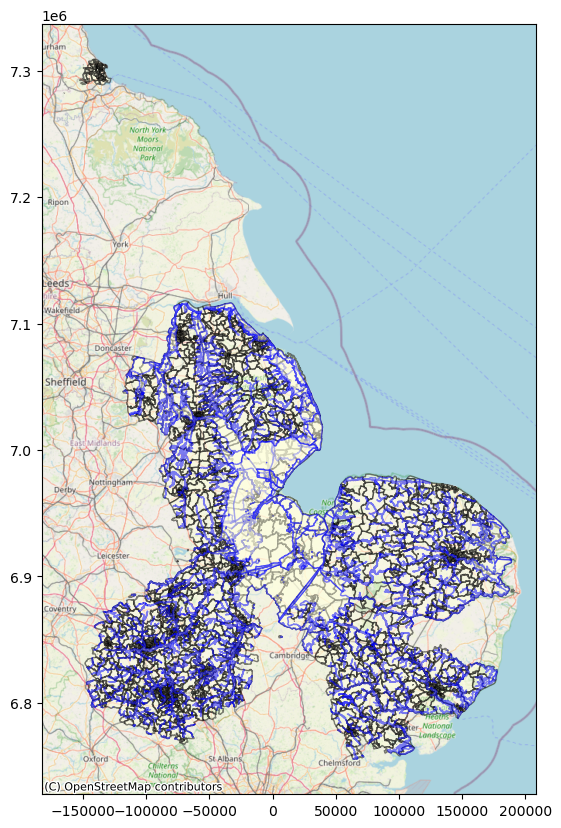

In [24]:
fig,ax = plt.subplots(figsize = (10,10))
DMA_shp.plot(ax=ax,color='lightyellow',edgecolor='black', alpha = 0.5)
overlap_flood_warning_alert_shp.plot(ax=ax,color='lightyellow',edgecolor='blue', alpha = 0.5)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
plt.show()